In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/Users/jm/working/acl_spring_24_bulls2/data/bulls2224_tickets_games.csv", 
                 parse_dates = ["event_date", "add_date", "arrival_time", "start_ct"]
               )

/var/folders/3q/d621fwvs43q2f6s93g46njd00000gn/T/ipykernel_58391/1845013132.py:1: DtypeWarning: Columns (21,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/jm/working/acl_spring_24_bulls2/data/bulls2224_tickets_games.csv",


In [3]:
df.dtypes

season_name                         object
event_date                  datetime64[ns]
event_weekday                       object
opponent_short                      object
parent_ticket_categories            object
add_date                    datetime64[ns]
days_before_event                    int64
purchaser_email                     object
total_seats                          int64
seat_location                       object
seat_level                          object
arrival_time                datetime64[ns]
attendee_email                      object
attendee_zip_code                   object
mobile_scan                        float64
scan_category                       object
G                                  float64
start_ct                    datetime64[ns]
away                               float64
Opponent                            object
outcome                             object
overtime                            object
pts                                float64
pts_all    

In [4]:
sum(df["purchaser_email"]==df["attendee_email"])/len(df)

0.37035939431667736

In [5]:
df["original_ticket_holder_flag"] = df["purchaser_email"]==df["attendee_email"]

In [6]:
df["arrival_time_before_tipoff"] = (df.start_ct - df.arrival_time).dt.total_seconds() / 60

In [7]:
df["overtime"] = [int(item.replace('OT', '')) if isinstance(item, str) else item for item in df.overtime]

In [9]:
df.columns

Index(['season_name', 'event_date', 'event_weekday', 'opponent_short',
       'parent_ticket_categories', 'add_date', 'days_before_event',
       'purchaser_email', 'total_seats', 'seat_location', 'seat_level',
       'arrival_time', 'attendee_email', 'attendee_zip_code', 'mobile_scan',
       'scan_category', 'G', 'start_ct', 'away', 'Opponent', 'outcome',
       'overtime', 'pts', 'pts_all', 'W', 'L', 'Streak', 'Notes',
       'original_ticket_holder_flag', 'arrival_time_before_tipoff'],
      dtype='object')

In [14]:
df = df[['season_name', 'event_date', 'event_weekday', 'opponent_short',
       'parent_ticket_categories', 'add_date', 'days_before_event',
       'purchaser_email', 'attendee_email', 'original_ticket_holder_flag',
       'total_seats', 'seat_location', 'seat_level',
       'arrival_time','arrival_time_before_tipoff', 'attendee_zip_code', 'mobile_scan',
       'scan_category', 'G', 'start_ct', 'Opponent', 'outcome',
       'overtime', 'pts', 'pts_all', 'W', 'L', 'Streak', 'Notes']
]

In [15]:
df.to_csv("/Users/jm/working/acl_spring_24_bulls2/data/bulls2224_tickets_games_clean.csv")

In [17]:
df.columns

Index(['season_name', 'event_date', 'event_weekday', 'opponent_short',
       'parent_ticket_categories', 'add_date', 'days_before_event',
       'purchaser_email', 'attendee_email', 'original_ticket_holder_flag',
       'total_seats', 'seat_location', 'seat_level', 'arrival_time',
       'arrival_time_before_tipoff', 'attendee_zip_code', 'mobile_scan',
       'scan_category', 'G', 'start_ct', 'Opponent', 'outcome', 'overtime',
       'pts', 'pts_all', 'W', 'L', 'Streak', 'Notes'],
      dtype='object')

In [19]:
df.tail()

,season_name,event_date,event_weekday,opponent_short,parent_ticket_categories,add_date,days_before_event,purchaser_email,attendee_email,original_ticket_holder_flag,...,start_ct,Opponent,outcome,overtime,pts,pts_all,W,L,Streak,Notes
570260,2023-2024 Chicago Bulls,2024-03-14,Thu,Clippers,Season,2024-03-13,1,cperez541@yahoo.com,cperez541@yahoo.com,True,...,2024-03-14 19:00:00,Los Angeles Clippers,L,0.0,111.0,126.0,32.0,35.0,L 1,NaN
570261,2023-2024 Chicago Bulls,2024-03-14,Thu,Clippers,Season,2024-03-13,1,neojoeoc@gmail.com,abongtan@yahoo.com,False,...,2024-03-14 19:00:00,Los Angeles Clippers,L,0.0,111.0,126.0,32.0,35.0,L 1,NaN
570262,2023-2024 Chicago Bulls,2024-03-14,Thu,Clippers,Season,2024-03-13,1,neojoeoc@gmail.com,quanhyiawade17@gmail.com,False,...,2024-03-14 19:00:00,Los Angeles Clippers,L,0.0,111.0,126.0,32.0,35.0,L 1,NaN
570263,2023-2024 Chicago Bulls,2024-03-14,Thu,Clippers,Season,2024-03-14,0,darrian_thurm@yahoo.com,darrian_thurm@yahoo.com,True,...,2024-03-14 19:00:00,Los Angeles Clippers,L,0.0,111.0,126.0,32.0,35.0,L 1,NaN
570264,2023-2024 Chicago Bulls,2024-03-14,Thu,Clippers,Season,2024-03-14,0,jdawgbeast23@yahoo.com,jdawgbeast23@yahoo.com,True,...,2024-03-14 19:00:00,Los Angeles Clippers,L,0.0,111.0,126.0,32.0,35.0,L 1,NaN


In [162]:
df.overtime.unique()

array([nan,  0.,  1.,  2.])

In [153]:
df[["overtime", "overtime2"]]
df.groupby("overtime2").agg({"G":'count'})

,G
overtime2,
0.0,473502
1.0,50440
2.0,14900


In [150]:
sum([271660, 33075, 201842, 17365, 14900, 31423])

570265

In [151]:
len(df)

570265

In [120]:
import numpy as np
sum(df.overtime == nan)

NameError: name 'nan' is not defined

In [122]:
convert 

0          True
1          True
2          True
3          True
4          True
          ...  
570260    False
570261    False
570262    False
570263    False
570264    False
Name: overtime, Length: 570265, dtype: bool

In [88]:
from collections import Counter
# Count the items
item_counts = Counter(xx)

# Group by count
grouped_by_count = {}
for item, count in item_counts.items():
    if count not in grouped_by_count:
        grouped_by_count[count] = [item]
    else:
        grouped_by_count[count].append(item)

print(grouped_by_count)

{8478: [nan], 473502: [0], 50440: [1], 14900: [2], 1: [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 

In [61]:
df.mobile_scan.astype(bool, errors = )

0         True
1         True
2         True
3         True
4         True
          ... 
570260    True
570261    True
570262    True
570263    True
570264    True
Name: mobile_scan, Length: 570265, dtype: bool

In [63]:
df.groupby('mobile_scan').agg({'attendee_email':'count'})

,attendee_email
mobile_scan,
0.0,2039
1.0,518485


In [65]:
df.head()

,season_name,event_date,event_weekday,opponent_short,parent_ticket_categories,add_date,days_before_event,purchaser_email,total_seats,seat_location,...,outcome,overtime,pts,pts_all,W,L,Streak,Notes,original_ticket_holder_flag,arrival_time_before_tipoff
0,2022-2023 Chicago Bulls,2022-10-04,Tue,Pelicans,Group,2022-09-27,7,frooogpop@outlook.com,1,100 Level End,...,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
1,2022-2023 Chicago Bulls,2022-10-04,Tue,Pelicans,Group,2022-09-27,7,frooogpop@outlook.com,2,100 Level Center,...,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
2,2022-2023 Chicago Bulls,2022-10-04,Tue,Pelicans,Group,2022-09-27,7,frooogpop@outlook.com,2,100 Level Center,...,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
3,2022-2023 Chicago Bulls,2022-10-04,Tue,Pelicans,Group,2022-09-27,7,frooogpop@outlook.com,2,100 Level Center,...,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
4,2022-2023 Chicago Bulls,2022-10-04,Tue,Pelicans,Group,2022-09-27,7,frooogpop@outlook.com,2,100 Level Center,...,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN


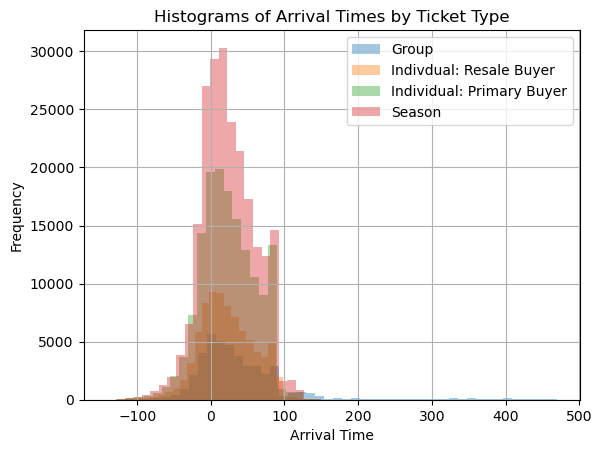

In [34]:
import matplotlib.pyplot as plt

# Group the DataFrame by 'Type' and plot a histogram for each group
for group_name, group_df in df.groupby('parent_ticket_categories'):
    group_df['arrival_time_before_tipoff'].hist(alpha=0.4, bins=50, label=str(group_name))
    
plt.title('Histograms of Arrival Times by Ticket Type')
plt.xlabel('Arrival Time')
plt.ylabel('Frequency')
plt.legend()

plt.show()


In [21]:
df.dtypes

season_name                  object
event_date                   object
event_weekday                object
opponent_short               object
parent_ticket_categories     object
add_date                     object
days_before_event             int64
email                        object
total_seats                   int64
seat_location                object
seat_level                   object
arrival_time                 object
attendee_email               object
attendee_zip_code            object
mobile_scan                 float64
scan_category                object
G                           float64
start_ct                     object
away                        float64
Opponent                     object
outcome                      object
overtime                     object
pts                         float64
pts_all                     float64
W                           float64
L                           float64
Streak                       object
Notes                       

In [11]:
df.parent_ticket_categories.unique()

array(['Group', 'Indivdual: Resale Buyer', 'Individual: Primary Buyer',
       'Season'], dtype=object)

In [19]:
len(df[df.parent_ticket_categories == "Indivdual: Resale Buyer"].email.unique())

1

In [20]:
df[df.parent_ticket_categories == "Indivdual: Resale Buyer"]

,season_name,event_date,event_weekday,opponent_short,parent_ticket_categories,add_date,days_before_event,email,total_seats,seat_location,...,away,Opponent,outcome,overtime,pts,pts_all,W,L,Streak,Notes
45946,2022-2023 Chicago Bulls,2022-10-04,Tue,Pelicans,Indivdual: Resale Buyer,2022-02-03,243,Masked for Confidentiality,1,100 Level Center,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45947,2022-2023 Chicago Bulls,2022-10-04,Tue,Pelicans,Indivdual: Resale Buyer,2022-02-03,243,Masked for Confidentiality,1,100 Level End,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45948,2022-2023 Chicago Bulls,2022-10-04,Tue,Pelicans,Indivdual: Resale Buyer,2022-02-03,243,Masked for Confidentiality,1,100 Level End,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45949,2022-2023 Chicago Bulls,2022-10-04,Tue,Pelicans,Indivdual: Resale Buyer,2022-02-03,243,Masked for Confidentiality,1,100 Level End,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45950,2022-2023 Chicago Bulls,2022-10-04,Tue,Pelicans,Indivdual: Resale Buyer,2022-02-03,243,Masked for Confidentiality,1,100 Level End,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133410,2023-2024 Chicago Bulls,2024-03-14,Thu,Clippers,Indivdual: Resale Buyer,2023-08-09,218,Masked for Confidentiality,4,300 Level,...,0.0,Los Angeles Clippers,L,0.0,111.0,126.0,32.0,35.0,L 1,NaN
133411,2023-2024 Chicago Bulls,2024-03-14,Thu,Clippers,Indivdual: Resale Buyer,2023-08-09,218,Masked for Confidentiality,4,300 Level,...,0.0,Los Angeles Clippers,L,0.0,111.0,126.0,32.0,35.0,L 1,NaN
133412,2023-2024 Chicago Bulls,2024-03-14,Thu,Clippers,Indivdual: Resale Buyer,2023-08-09,218,Masked for Confidentiality,4,300 Level,...,0.0,Los Angeles Clippers,L,0.0,111.0,126.0,32.0,35.0,L 1,NaN
133413,2023-2024 Chicago Bulls,2024-03-14,Thu,Clippers,Indivdual: Resale Buyer,2023-08-09,218,Masked for Confidentiality,4,300 Level,...,0.0,Los Angeles Clippers,L,0.0,111.0,126.0,32.0,35.0,L 1,NaN
